In [ ]:
install.packages("caret")
install.packages("tree")
install.packages("randomForest")
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# @title Prepocessing
library(rpart)
library(caret)
library(tree)
library(randomForest)
library(e1071)
library(ROCR)
data <- read.csv("/creditworthiness.csv")

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
cdata = subset(data, data[,46] > 0)
unknownData = subset(data, data[,46] == 0)

In [ ]:
cw.k <- cdata

In [ ]:

cw.train <- cw.k[1:(nrow(cw.k)/2), ]
cw.test <- cw.k[-(1:(nrow(cw.k)/2)), ]

In [ ]:
cat("Dimensions of Training Set (cw.train):", dim(cw.train), "\n")
cat("Dimensions of Test Set (cw.test):", dim(cw.test), "\n")

Dimensions of Training Set (cw.train): 981 46 
Dimensions of Test Set (cw.test): 981 46 


In [ ]:

tree_model <- rpart(factor(credit.rating)~ ., data=cw.train)
print(tree_model)

n= 981 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 981 478 2 (0.23037717 0.51274210 0.25688073)  
   2) functionary>=0.5 272 142 1 (0.47794118 0.34926471 0.17279412)  
     4) re.balanced..paid.back..a.recently.overdrawn.current.acount>=0.5 261 131 1 (0.49808429 0.35249042 0.14942529)  
       8) FI3O.credit.score>=0.5 252 122 1 (0.51587302 0.35714286 0.12698413) *
       9) FI3O.credit.score< 0.5 9   2 3 (0.00000000 0.22222222 0.77777778) *
     5) re.balanced..paid.back..a.recently.overdrawn.current.acount< 0.5 11   3 3 (0.00000000 0.27272727 0.72727273) *
   3) functionary< 0.5 709 301 2 (0.13540197 0.57545839 0.28913963)  
     6) FI3O.credit.score>=0.5 651 256 2 (0.14746544 0.60675883 0.24577573)  
      12) re.balanced..paid.back..a.recently.overdrawn.current.acount>=0.5 594 218 2 (0.15488215 0.63299663 0.21212121) *
      13) re.balanced..paid.back..a.recently.overdrawn.current.acount< 0.5 57  23 3 (0.07017544 0.33333333 0.59649123) *
     7) F

In [ ]:

median_customer <- data.frame(
  functionary = 0,
  re.balanced..paid.back..a.recently.overdrawn.current.acount = 1,
  FI3O.credit.score = 1,
  gender = 0,
  X0..accounts.at.other.banks = 3,
  credit.refused.in.past. = 0,
  years.employed = 3,
  savings.on.other.accounts = 3,
  self.employed. = 0,
  max..account.balance.12.months.ago = 3,
  min..account.balance.12.months.ago = 3,
  avrg..account.balance.12.months.ago = 3,
  max..account.balance.11.months.ago = 3,
  min..account.balance.11.months.ago = 3,
  avrg..account.balance.11.months.ago = 3,
  max..account.balance.10.months.ago = 3,
  min..account.balance.10.months.ago = 3,
  avrg..account.balance.10.months.ago = 3,
  max..account.balance.9.months.ago = 3,
  min..account.balance.9.months.ago = 3,
  avrg..account.balance.9.months.ago = 3,
  max..account.balance.8.months.ago = 3,
  min..account.balance.8.months.ago = 3,
  avrg..account.balance.8.months.ago = 3,
  max..account.balance.7.months.ago = 3,
  min..account.balance.7.months.ago = 3,
  avrg..account.balance.7.months.ago = 3,
  max..account.balance.6.months.ago = 3,
  min..account.balance.6.months.ago = 3,
  avrg..account.balance.6.months.ago = 3,
  max..account.balance.5.months.ago = 3,
  min..account.balance.5.months.ago = 3,
  avrg..account.balance.5.months.ago = 3,
  max..account.balance.4.months.ago = 3,
  min..account.balance.4.months.ago = 3,
  avrg..account.balance.4.months.ago = 3,
  max..account.balance.3.months.ago = 3,
  min..account.balance.3.months.ago = 3,
  avrg..account.balance.3.months.ago = 3,
  max..account.balance.2.months.ago = 3,
  min..account.balance.2.months.ago = 3,
  avrg..account.balance.2.months.ago = 3,
  max..account.balance.1.months.ago = 3,
  min..account.balance.1.months.ago = 3,
  avrg..account.balance.1.months.ago = 3
)

# Predict the credit rating of the median customer
predicted_rating <- predict(tree_model, newdata=median_customer,type="class")

# Print the predicted credit rating
print(predicted_rating)

1 
2 
Levels: 1 2 3


In [ ]:
# Determine the majority class prediction
temp <- names(sort(table(predicted_rating), decreasing = TRUE))[1]

# Print the majority class prediction
print(temp)

[1] "2"


In [ ]:

predicted_ratings <- predict(tree_model, cw.test,type = "class")

# Create the confusion matrix
conf_matrix <- table(predicted_ratings, cw.test$credit.rating)

# Print the confusion matrix
print(conf_matrix)

# Calculate overall accuracy rate
overall_accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Overall Accuracy Rate:", overall_accuracy))

                 
predicted_ratings   1   2   3
                1 162  85  37
                2  90 361 143
                3   5  21  77
[1] "Overall Accuracy Rate: 0.611620795107034"


In [ ]:

# get the count of all classes in credit.rating using the table() function
beforeCountFreq = table(cw.train$credit.rating)
#find the probability of each class
beforeClassProb = beforeCountFreq/sum(beforeCountFreq)
#calculate entropy (before split)
beforeEntropy = -sum(beforeClassProb * log2(beforeClassProb))
print(beforeEntropy)

[1] 1.485749


In [ ]:
# functionary == 0
countFreq0 = table(cw.train$credit.rating[cw.train$functionary == 0])
classProb0 = countFreq0/sum(countFreq0)
functionaryEnt0 = -sum(classProb0 * log2(classProb0))
print(functionaryEnt0)

[1] 1.366963


In [ ]:
# functionary == 1
countFreq1 = table(cw.train$credit.rating[cw.train$functionary == 1])
classProb1 = countFreq1/sum(countFreq1)
functionaryEnt1 = -sum(classProb1 * log2(classProb1))
print(functionaryEnt1)

[1] 1.476765


In [ ]:
ent = (beforeEntropy - (functionaryEnt0 * sum(countFreq0) +
functionaryEnt1 * sum(countFreq1)) /
sum(sum(countFreq0) + sum(countFreq1)))
print(ent)

[1] 0.0883414


In [ ]:
# Define the probabilities for each class at the root node
p_root <- c(0.23037717, 0.51274210, 0.25688073)

# Define the probabilities for each class at the child nodes
p_child_left <- c(0.47794118, 0.34926471, 0.17279412)
p_child_right <- c(0.13540197, 0.57545839, 0.28913963)

# Calculate the entropy at the root node
entropy_root <- -sum(p_root * log2(p_root))

# Calculate the entropy at the child nodes
entropy_child_left <- -sum(p_child_left * log2(p_child_left))
entropy_child_right <- -sum(p_child_right * log2(p_child_right))

# Calculate the weighted average entropy of the child nodes
weighted_entropy_children <- (entropy_child_left * 272 + entropy_child_right * 709) / 981

# Calculate the gain in entropy
gain_entropy <- entropy_root - weighted_entropy_children

# Print the gain in entropy
print(paste("Gain in Entropy:", gain_entropy))

[1] "Gain in Entropy: 0.0883414087879082"


In [ ]:

rf_model <- randomForest(factor(credit.rating)~., data = cw.train)
print(rf_model)


Call:
 randomForest(formula = factor(credit.rating) ~ ., data = cw.train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 44.14%
Confusion matrix:
   1   2  3 class.error
1 54 172  0   0.7610619
2 37 441 25   0.1232604
3 10 189 53   0.7896825


Error rate is 42.1% higher than decision tree

In [ ]:

rf_pred <- predict(rf_model, cw.test)

# Create the confusion matrix
confRF <- table(rf_pred, cw.test$credit.rating)

# Print the confusion matrix
print(confRF)

# Calculate overall accuracy rate
RF_accuracy <- sum(diag(confRF)) / sum(confRF)
print(paste("Overall Accuracy Rate:", RF_accuracy))

       
rf_pred   1   2   3
      1  55  40  12
      2 200 415 191
      3   2  12  54
[1] "Overall Accuracy Rate: 0.534148827726809"


In [ ]:
tune_rf_model <- randomForest(factor(credit.rating)~., data = cw.train, mtry
= 12, ntree=500, stepFactor=2, improve=0.2)
tune_rf_pred <- predict(tune_rf_model, cw.test)

tune_confRF <- table(tune_rf_pred, cw.test$credit.rating)

# Print the confusion matrix
print(tune_confRF)

# Calculate overall accuracy rate
tune_RF_accuracy <- sum(diag(tune_confRF)) / sum(tune_confRF)
print(paste("Overall Accuracy Rate:", tune_RF_accuracy))

            
tune_rf_pred   1   2   3
           1 112  58  25
           2 142 391 166
           3   3  18  66
[1] "Overall Accuracy Rate: 0.580020387359837"


Overall Random Forest Accuracy before and after tuning is lower than decision tree accruracy. Before tuning Accuracy is53.4%, After tuning 58.0%

In [ ]:

# Fit a support vector machine
svm_model <- svm(factor(credit.rating) ~ ., data = cw.train, kernel = "radial")

# Print the SVM model
print(svm_model)


Call:
svm(formula = factor(credit.rating) ~ ., data = cw.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  937



In [ ]:

# Predict the credit rating of the median customer
svm_med_pred <- predict(svm_model, newdata=median_customer, decision.values = TRUE)
# Print the predicted credit rating
print(svm_med_pred)

1 
2 
attr(,"decision.values")
       2/1      2/3         1/3
1 1.021296 1.511396 -0.04938262
Levels: 1 2 3


In [ ]:
# Determine the majority class prediction
temp <- names(sort(table(svm_med_pred), decreasing = TRUE))[1]

# Print the majority class prediction
print(temp)

[1] "2"


In [ ]:

# Predict the credit ratings for the test set using the SVM model
svm_pred <- predict(svm_model, newdata = cw.test)

confSVM <- table(svm_pred, cw.test$credit.rating)

# Print the confusion matrix
print(confSVM)

# Calculate overall accuracy rate
SVM_accuracy <- sum(diag(confSVM)) / sum(confSVM)
print(paste("Overall Accuracy Rate:", SVM_accuracy))

        
svm_pred   1   2   3
       1 109  56  22
       2 143 393 162
       3   5  18  73
[1] "Overall Accuracy Rate: 0.586136595310907"


In [ ]:

summary(tune.svm(factor(credit.rating) ~ ., data = cw.train,
kernel = "radial",cost = 10^c(0:2), gamma = 10^c(-4:-1)))
# Fit a model using SVM
svmTuned = svm(factor(credit.rating) ~ ., data = cw.train, kernel = "radial",
cost=100,
gamma = 0.0001)
# Predict the values on test set
svmTuned_pred <- predict(svmTuned, cw.test)
# Produce confusion matrix
confTunedSVM <- table(svmTuned_pred, cw.test$credit.rating)

# Print the confusion matrix
print(confTunedSVM)

# Overall accuracy rate
svm_tuned_accuracy = sum(diag(confTunedSVM))/sum(confTunedSVM)
print(svm_tuned_accuracy)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 0.001   10

- best performance: 0.3936199 

- Detailed performance results:
   gamma cost     error dispersion
1  1e-04    1 0.4873634 0.06301757
2  1e-03    1 0.4741084 0.06593086
3  1e-02    1 0.4048444 0.07433211
4  1e-01    1 0.4873634 0.06301757
5  1e-04   10 0.4567821 0.06184884
6  1e-03   10 0.3936199 0.06209939
7  1e-02   10 0.4740878 0.05573965
8  1e-01   10 0.4873634 0.06301757
9  1e-04  100 0.3956504 0.05973096
10 1e-03  100 0.3976706 0.05952811
11 1e-02  100 0.4801690 0.04546022
12 1e-01  100 0.4873634 0.06301757


             
svmTuned_pred   1   2   3
            1 159  87  39
            2  93 361 146
            3   5  19  72
[1] 0.6034659


*   Before: 0.58613
*   After : 0.60346

In [ ]:

nb_model <- naiveBayes(factor(credit.rating) ~ ., data = cw.train)

In [ ]:

# Predict the credit rating of the median customer
nb_med_pred <- predict(nb_model, median_customer)
# Print the predicted credit rating
print(nb_med_pred)

[1] 1
Levels: 1 2 3


In [ ]:
# Determine the majority class prediction
temp <- names(sort(table(nb_med_pred), decreasing = TRUE))[1]

# Print the majority class prediction
print(temp)

[1] "1"


In [ ]:
nb_med_pred_r <- predict(nb_model, median_customer, type='raw')
print(nb_med_pred_r)

             1          2            3
[1,] 0.9850729 0.01393277 0.0009942948


In [ ]:

print(nb_model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        1         2         3 
0.2303772 0.5127421 0.2568807 

Conditional probabilities:
   functionary
Y        [,1]      [,2]
  1 0.5752212 0.4954066
  2 0.1888668 0.3917924
  3 0.1865079 0.3902912

   re.balanced..paid.back..a.recently.overdrawn.current.acount
Y        [,1]      [,2]
  1 0.9823009 0.1321481
  2 0.9542744 0.2090974
  3 0.8095238 0.3934582

   FI3O.credit.score
Y        [,1]      [,2]
  1 1.0000000 0.0000000
  2 0.9701789 0.1702628
  3 0.7936508 0.4054894

   gender
Y        [,1]      [,2]
  1 0.5265487 0.5004030
  2 0.4015905 0.4907079
  3 0.3531746 0.4789075

   X0..accounts.at.other.banks
Y       [,1]     [,2]
  1 2.898230 1.370579
  2 3.079523 1.410560
  3 3.047619 1.433004

   credit.refused.in.past.
Y         [,1]      [,2]
  1 0.05752212 0.2333544
  2 0.09940358 0.2995010
  3 0.21428571 0.4111425

   years.employed
Y       [,1] 

In [ ]:
nb_pred <- predict(nb_model, cw.test)
# Produce confusion matrix
confnb <- table(nb_pred, cw.test$credit.rating)

# Print the confusion matrix
print(confnb)

# Overall accuracy rate
nb_accuracy = sum(diag(confnb))/sum(confnb)
print(nb_accuracy)

       
nb_pred   1   2   3
      1 252 439 173
      2   0   4   6
      3   5  24  78
[1] 0.3404689


In [ ]:

print(paste("Decision Tree Accuracy Rate:", overall_accuracy))
print("Decison tree:")
print(conf_matrix)#tree
print("Random Forest")
print(rf_model)#RF
print("SVM")
print(confSVM)#SVM
print("Naive Bayes")
print(confnb)#NB

[1] "Decision Tree Accuracy Rate: 0.611620795107034"
[1] "Decison tree:"
                 
predicted_ratings   1   2   3
                1 162  85  37
                2  90 361 143
                3   5  21  77
[1] "Random Forest"

Call:
 randomForest(formula = factor(credit.rating) ~ ., data = cw.train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 44.14%
Confusion matrix:
   1   2  3 class.error
1 54 172  0   0.7610619
2 37 441 25   0.1232604
3 10 189 53   0.7896825
[1] "SVM"
        
svm_pred   1   2   3
       1 109  56  22
       2 143 393 162
       3   5  18  73
[1] "Naive Bayes"
       
nb_pred   1   2   3
      1 252 439 173
      2   0   4   6
      3   5  24  78


Based on the confusion metrices i think that Decision Tree is the best. it has the best accuracy. More true positive.

I think that the classifier have difficulty predicting the actual class 2. They predict it as class 1. For example Naive Bayes has 439, random forest has 172 and decision tree has 85

In [ ]:

glm.fit <- glm((credit.rating==1)~., data = cw.train, family = binomial)

In [ ]:

options(width = 130)
summary(glm.fit)


Call:
glm(formula = (credit.rating == 1) ~ ., family = binomial, data = cw.train)

Coefficients:
                                                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                                                 -17.551605 429.995589  -0.041  0.96744    
functionary                                                   1.740533   0.183036   9.509  < 2e-16 ***
re.balanced..paid.back..a.recently.overdrawn.current.acount   1.501222   0.550965   2.725  0.00644 ** 
FI3O.credit.score                                            16.502759 429.993845   0.038  0.96939    
gender                                                        0.577104   0.178807   3.228  0.00125 ** 
X0..accounts.at.other.banks                                  -0.027413   0.063141  -0.434  0.66417    
credit.refused.in.past.                                      -0.935877   0.341848  -2.738  0.00619 ** 
years.employed                                                0.672572   0.269

using the p value the significant predictor are


*   functionary
*   re.balanced..paid.back..a.recently.overdrawn.current.acount
*   gender
*   credit.refused.in.past.
*   years.employed
*   savings.on.other.accounts



In [ ]:

tuned_svm <- tune.svm((credit.rating == 1) ~ ., data = cw.train,
                      kernel = "radial", cost = 10^c(-2:2), gamma = 10^c(-4:1),
                      type = 'C')

# Print the summary of tuned SVM
summary(tuned_svm)

# Fit SVM model with type = "C"
svm_model <- svm(I(credit.rating == 1) ~ ., data = cw.train, type = "C")

# Print the SVM model
print(svm_model)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
 0.001  100

- best performance: 0.2130282 

- Detailed performance results:
   gamma  cost     error dispersion
1  1e-04 1e-02 0.2303649 0.05545095
2  1e-03 1e-02 0.2303649 0.05545095
3  1e-02 1e-02 0.2303649 0.05545095
4  1e-01 1e-02 0.2303649 0.05545095
5  1e+00 1e-02 0.2303649 0.05545095
6  1e+01 1e-02 0.2303649 0.05545095
7  1e-04 1e-01 0.2303649 0.05545095
8  1e-03 1e-01 0.2303649 0.05545095
9  1e-02 1e-01 0.2303649 0.05545095
10 1e-01 1e-01 0.2303649 0.05545095
11 1e+00 1e-01 0.2303649 0.05545095
12 1e+01 1e-01 0.2303649 0.05545095
13 1e-04 1e+00 0.2303649 0.05545095
14 1e-03 1e+00 0.2303649 0.05545095
15 1e-02 1e+00 0.2303546 0.05844457
16 1e-01 1e+00 0.2303649 0.05545095
17 1e+00 1e+00 0.2303649 0.05545095
18 1e+01 1e+00 0.2303649 0.05545095
19 1e-04 1e+01 0.2303649 0.05545095
20 1e-03 1e+01 0.2405586 0.04457604
21 1e-02 1e+01 0.2344362 0.02523601
22 1e-01 1e+01 0.2303649 


Call:
svm(formula = I(credit.rating == 1) ~ ., data = cw.train, type = "C")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  664



In [ ]:
# Predict the values on test set[SVM]
svm.fit.pred = predict(svm_model, cw.test[,-46], decision.values =TRUE)
# Predict the values on test set[GLM]
glm.fit.pred = predict(glm.fit, cw.test[,-46])

In [ ]:

confusionSVM = prediction(-attr(svm.fit.pred, "decision.values"),
cw.test$credit.rating == 1)

# Create rocs curve based on prediction
rocsSVM <- performance(confusionSVM, "tpr", "fpr")

In [ ]:
#make prediction using Logidtic Regression
confusionGLM = prediction(glm.fit.pred, cw.test$credit.rating == 1)

#create rocs curve based on prediction
rocsGLM <- performance(confusionGLM, "tpr", "fpr")

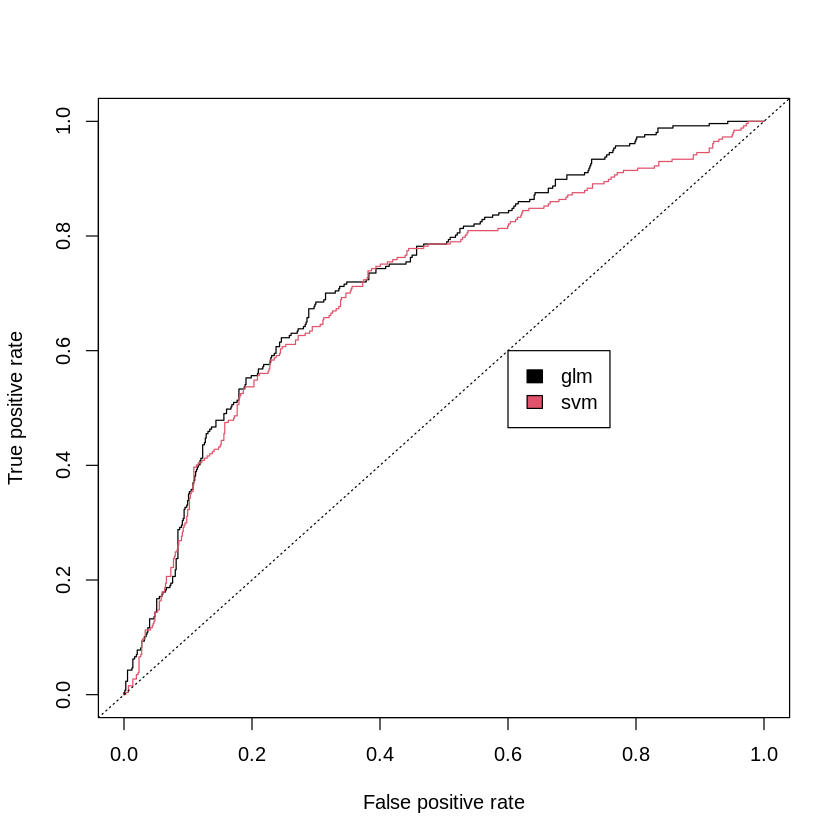

In [ ]:
# Plot the graph
plot(rocsGLM, col=1)
plot(rocsSVM, col= 2 ,add=TRUE)
abline(0, 1, lty = 3)
# Add the legend to the graph
legend(0.6, 0.6, c('glm','svm'), 1:2)


glm performs better generally. glm has higher AUC.